In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, LeaveOneOut, cross_val_score, cross_validate, cross_val_predict, GridSearchCV, KFold
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, plot_roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, classification_report, f1_score, accuracy_score, precision_score, recall_score, plot_roc_curve, mean_squared_error
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA, QuadraticDiscriminantAnalysis as QDA
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier
from pomegranate import *
from sklearn import preprocessing
import seaborn as sn
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
dataset=pd.read_csv('data/rock_music.csv')
dataset.set_index('name', inplace=True)
dataset

,artist,release_date,duration,popularity,danceability,acousticness,energy,instrumentalness,key,liveness,loudness,speechiness,tempo,time_signature,valence,hit
name,,,,,,,,,,,,,,,,
Smells Like Teen Spirit,Nirvana,1991,5.03,74,0.502,0.000025,0.912,0.000173,1,0.1060,-4.556,0.0564,116.761,4,0.720,1
Stairway to Heaven - Remaster,Led Zeppelin,1971,8.05,78,0.338,0.580000,0.340,0.003200,9,0.1160,-12.049,0.0339,82.433,4,0.197,1
Bohemian Rhapsody - Remastered 2011,Queen,1975,5.91,74,0.392,0.288000,0.402,0.000000,0,0.2430,-9.961,0.0536,143.883,4,0.228,1
Imagine - Remastered 2010,John Lennon,1971,3.13,77,0.547,0.907000,0.257,0.183000,0,0.0935,-12.358,0.0252,75.752,4,0.169,1
(I Can't Get No) Satisfaction - Mono Version,The Rolling Stones,1965,3.71,77,0.723,0.038300,0.863,0.031700,2,0.1280,-7.890,0.0338,136.302,4,0.931,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
I'm In Your Mind,King Gizzard & The Lizard Wizard,2014,3.56,47,0.296,0.005910,0.776,0.801000,6,0.5970,-5.630,0.0597,93.481,4,0.406,0
Cellophane,King Gizzard & The Lizard Wizard,2014,3.18,44,0.432,0.002130,0.887,0.916000,7,0.1200,-6.175,0.1230,92.965,4,0.357,0
Hot Water,King Gizzard & The Lizard Wizard,2014,3.40,40,0.627,0.860000,0.609,0.890000,9,0.1160,-9.387,0.0332,86.861,4,0.734,0


&nbsp;

Поделба на податоците

In [3]:
features = dataset.columns.drop(['hit'])
labels = ['hit']

X = dataset[features]
Y = dataset[labels]

In [4]:
encoder =  LabelEncoder()
X['artist'] = encoder.fit_transform(X['artist'])
X.head()

,artist,release_date,duration,popularity,danceability,acousticness,energy,instrumentalness,key,liveness,loudness,speechiness,tempo,time_signature,valence
name,,,,,,,,,,,,,,,
Smells Like Teen Spirit,942,1991,5.03,74,0.502,0.000025,0.912,0.000173,1,0.1060,-4.556,0.0564,116.761,4,0.720
Stairway to Heaven - Remaster,772,1971,8.05,78,0.338,0.580000,0.340,0.003200,9,0.1160,-12.049,0.0339,82.433,4,0.197
Bohemian Rhapsody - Remastered 2011,1045,1975,5.91,74,0.392,0.288000,0.402,0.000000,0,0.2430,-9.961,0.0536,143.883,4,0.228
Imagine - Remastered 2010,704,1971,3.13,77,0.547,0.907000,0.257,0.183000,0,0.0935,-12.358,0.0252,75.752,4,0.169
(I Can't Get No) Satisfaction - Mono Version,1516,1965,3.71,77,0.723,0.038300,0.863,0.031700,2,0.1280,-7.890,0.0338,136.302,4,0.931


In [5]:
trainX, testX, trainY, testY = train_test_split(X, Y, test_size=0.2)

In [6]:
scaler = StandardScaler()
scaler.fit(trainX)
trainX = scaler.transform(trainX)
testX = scaler.transform(testX)
X = pd.DataFrame(scaler.transform(X))

In [7]:
dataset.hit.value_counts()

0    2844
1    2640
Name: hit, dtype: int64

&nbsp;

## Decision Tree Classifier

In [8]:
dt = DecisionTreeClassifier(criterion = 'entropy', max_depth=7)
dt.fit(trainX, trainY)

DecisionTreeClassifier(criterion='entropy', max_depth=7)

In [9]:
predicted = dt.predict(testX)

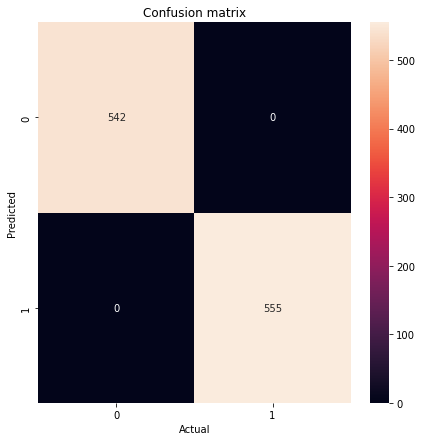

In [10]:
plt.figure(figsize=(7,7))
sn.heatmap(confusion_matrix(testY, predicted), annot=True, fmt='.5g')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Confusion matrix')
plt.show()

In [11]:
accuracy = accuracy_score(testY, predicted)
recall = recall_score(testY, predicted)
precision = precision_score(testY, predicted)
f1 = f1_score(testY, predicted)

print(f'Accuracy: {accuracy}')
print(f'Recall: {recall}')
print(f'Precision: {precision}')
print(f'F1 score: {f1}')

Accuracy: 1.0
Recall: 1.0
Precision: 1.0
F1 score: 1.0


<Figure size 720x720 with 0 Axes>

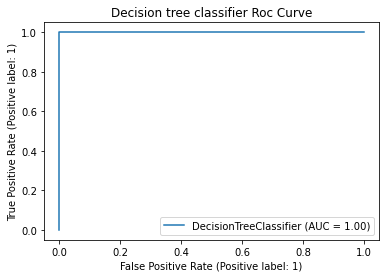

In [12]:
plt.figure(figsize=(10,10))
plot_roc_curve(dt, testX, testY)
plt.title('Decision tree classifier Roc Curve')
plt.show()

&nbsp;

## Naive Bayes

In [13]:
model = GaussianNB()
model.fit(trainX, trainY)

GaussianNB()

In [14]:
predicted = model.predict(testX)

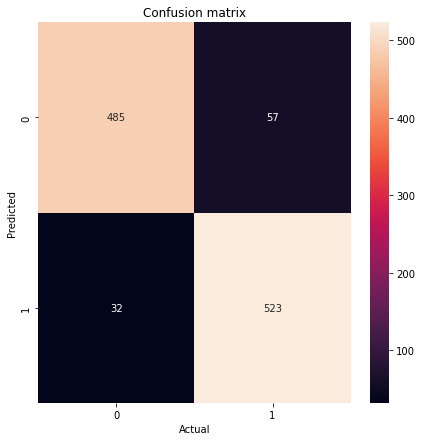

In [15]:
plt.figure(figsize=(7,7))
sn.heatmap(confusion_matrix(testY, predicted), annot=True, fmt='.5g')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Confusion matrix')
plt.show()

In [16]:
accuracy = accuracy_score(testY, predicted)
recall = recall_score(testY, predicted)
precision = precision_score(testY, predicted)
f1 = f1_score(testY, predicted)

print(f'Accuracy: {accuracy}')
print(f'Recall: {recall}')
print(f'Precision: {precision}')
print(f'F1 score: {f1}')

Accuracy: 0.918869644484959
Recall: 0.9423423423423424
Precision: 0.9017241379310345
F1 score: 0.9215859030837005


<Figure size 720x720 with 0 Axes>

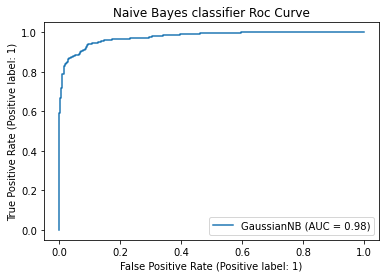

In [17]:
plt.figure(figsize=(10,10))
plot_roc_curve(model, testX, testY)
plt.title('Naive Bayes classifier Roc Curve')
plt.show()

&nbsp;

## KNN

In [18]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(trainX, trainY)

KNeighborsClassifier()

In [19]:
predicted = knn.predict(testX)

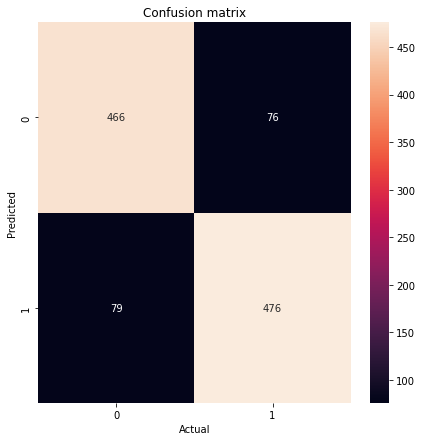

In [20]:
plt.figure(figsize=(7,7))
sn.heatmap(confusion_matrix(testY, predicted), annot=True, fmt='.5g')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Confusion matrix')
plt.show()

In [21]:
accuracy = accuracy_score(testY, predicted)
recall = recall_score(testY, predicted)
precision = precision_score(testY, predicted)
f1 = f1_score(testY, predicted)

print(f'Accuracy: {accuracy}')
print(f'Recall: {recall}')
print(f'Precision: {precision}')
print(f'F1 score: {f1}')

Accuracy: 0.8587055606198724
Recall: 0.8576576576576577
Precision: 0.8623188405797102
F1 score: 0.8599819331526649


<Figure size 720x720 with 0 Axes>

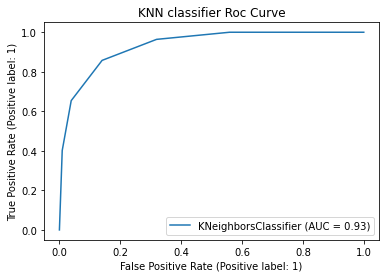

In [22]:
plt.figure(figsize=(10,10))
plot_roc_curve(knn, testX, testY)
plt.title('KNN classifier Roc Curve')
plt.show()

In [23]:
error1 = []

for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i, metric="cosine")
    knn.fit(trainX, trainY)
    pred_i = knn.predict(testX)
    error1.append(np.mean(pred_i != testY.values))
    

error2 = []

for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i, metric="euclidean")
    knn.fit(trainX, trainY)
    pred_i = knn.predict(testX)
    error2.append(np.mean(pred_i != testY.values))
    
error3 = []

for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i, metric="manhattan")
    knn.fit(trainX, trainY)
    pred_i = knn.predict(testX)
    error3.append(np.mean(pred_i != testY.values))
    
error4 = []

for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i, metric="minkowski")
    knn.fit(trainX, trainY)
    pred_i = knn.predict(testX)
    error4.append(np.mean(pred_i != testY.values))

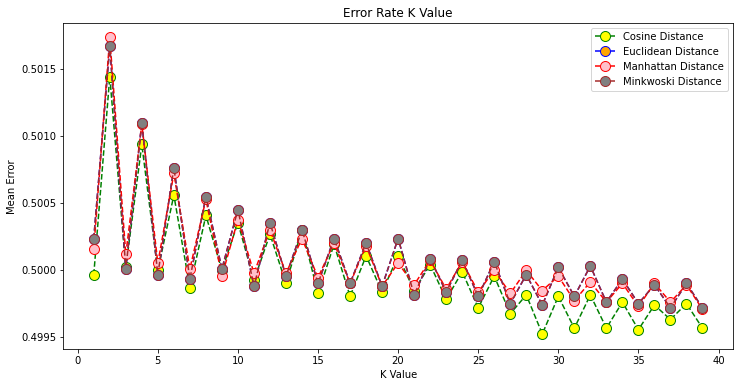

In [24]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error1, color='green', linestyle='dashed', marker='o',
         markerfacecolor='yellow', markersize=10, label='Cosine Distance')
plt.plot(range(1, 40), error2, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='orange', markersize=10, label='Euclidean Distance')
plt.plot(range(1, 40), error3, color='red', linestyle='dashed', marker='o',
         markerfacecolor='pink', markersize=10, label='Manhattan Distance')
plt.plot(range(1, 40), error4, color='brown', linestyle='dashed', marker='o',
         markerfacecolor='gray', markersize=10, label='Minkwoski Distance')

plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
plt.legend()
plt.show()

&nbsp;

## Logistic regression

In [25]:
log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(trainX, trainY)

LogisticRegression(max_iter=10000)

In [26]:
predicted = log_reg.predict(testX)

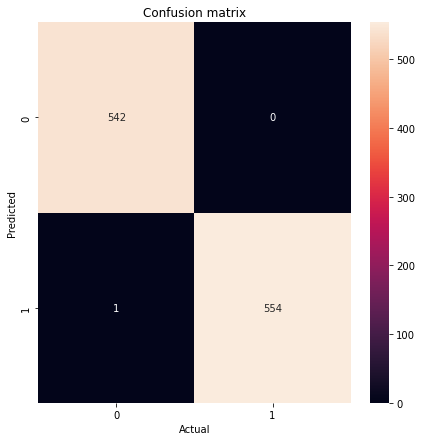

In [27]:
plt.figure(figsize=(7,7))
sn.heatmap(confusion_matrix(testY, predicted), annot=True, fmt='.5g')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Confusion matrix')
plt.show()

In [28]:
accuracy = accuracy_score(testY, predicted)
recall = recall_score(testY, predicted)
precision = precision_score(testY, predicted)
f1 = f1_score(testY, predicted)

print(f'Accuracy: {accuracy}')
print(f'Recall: {recall}')
print(f'Precision: {precision}')
print(f'F1 score: {f1}')

Accuracy: 0.9990884229717412
Recall: 0.9981981981981982
Precision: 1.0
F1 score: 0.9990982867448152


<Figure size 720x720 with 0 Axes>

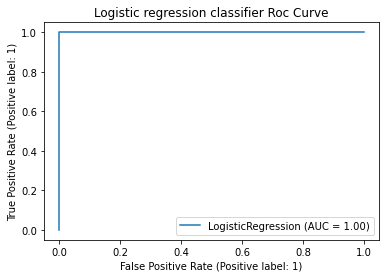

In [29]:
plt.figure(figsize=(10,10))
plot_roc_curve(log_reg, testX, testY)
plt.title('Logistic regression classifier Roc Curve')
plt.show()

&nbsp;

## Linear Discriminant Analysis (LDA)

In [30]:
lda = LDA()
lda.fit(trainX, trainY)

LinearDiscriminantAnalysis()

In [31]:
predicted = lda.predict(testX)

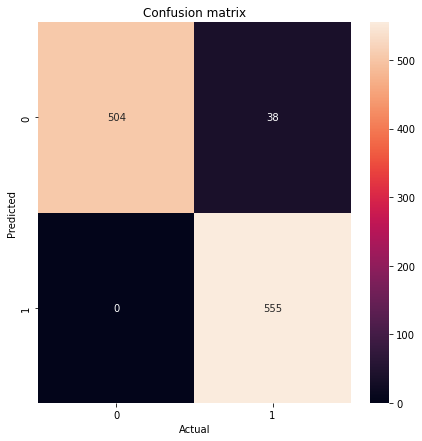

In [32]:
plt.figure(figsize=(7,7))
sn.heatmap(confusion_matrix(testY, predicted), annot=True, fmt='.5g')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Confusion matrix')
plt.show()

In [33]:
accuracy = accuracy_score(testY, predicted)
recall = recall_score(testY, predicted)
precision = precision_score(testY, predicted)
f1 = f1_score(testY, predicted)

print(f'Accuracy: {accuracy}')
print(f'Recall: {recall}')
print(f'Precision: {precision}')
print(f'F1 score: {f1}')

Accuracy: 0.9653600729261622
Recall: 1.0
Precision: 0.9359190556492412
F1 score: 0.9668989547038328


<Figure size 720x720 with 0 Axes>

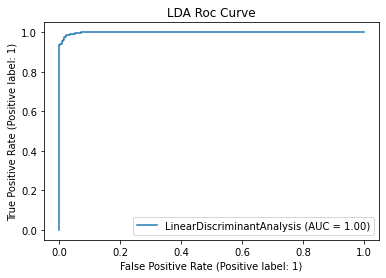

In [34]:
plt.figure(figsize=(10,10))
plot_roc_curve(lda, testX, testY)
plt.title('LDA Roc Curve')
plt.show()

&nbsp;

## Ensemble models

#### Voting classifier

In [35]:
voting_clf = VotingClassifier(estimators=[('KNN', knn), ('DTree', dt), ('LogReg', log_reg)], voting='hard')
voting_clf.fit(trainX, trainY)

VotingClassifier(estimators=[('KNN', KNeighborsClassifier(n_neighbors=39)),
                             ('DTree',
                              DecisionTreeClassifier(criterion='entropy',
                                                     max_depth=7)),
                             ('LogReg', LogisticRegression(max_iter=10000))])

In [36]:
predicted = voting_clf.predict(testX)

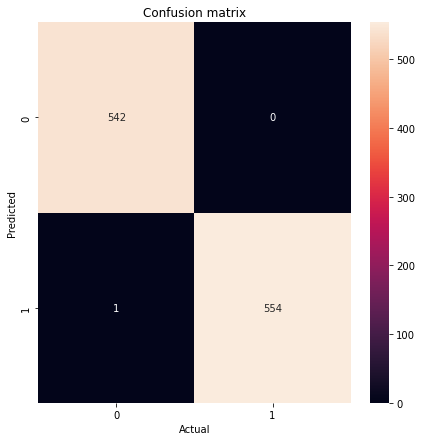

In [37]:
plt.figure(figsize=(7,7))
sn.heatmap(confusion_matrix(testY, predicted), annot=True, fmt='.5g')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Confusion matrix')
plt.show()

In [38]:
accuracy = accuracy_score(testY, predicted)
recall = recall_score(testY, predicted)
precision = precision_score(testY, predicted)
f1 = f1_score(testY, predicted)

print(f'Accuracy: {accuracy}')
print(f'Recall: {recall}')
print(f'Precision: {precision}')
print(f'F1 score: {f1}')

Accuracy: 0.9990884229717412
Recall: 0.9981981981981982
Precision: 1.0
F1 score: 0.9990982867448152


#### Bagging

In [39]:
logreg_bagging_model = BaggingClassifier(base_estimator=log_reg, n_estimators=5)
dt_bagging_model = BaggingClassifier(base_estimator=dt, n_estimators=5)
random_forest = RandomForestClassifier(n_estimators=10)
extra_trees = ExtraTreesClassifier(n_estimators=10)

def bagging_ensemble(model):
    k_folds = KFold(n_splits=20)
    results = cross_val_score(model, trainX, trainY, cv=k_folds)
    print(results.mean())

bagging_ensemble(logreg_bagging_model)
bagging_ensemble(dt_bagging_model)
bagging_ensemble(random_forest)
bagging_ensemble(extra_trees)

0.9974916977999169
1.0
0.9995444167704441
0.9537401411374015


#### Adaptive Boosting (Ada Boost)

In [40]:
kfold = KFold(n_splits=10)
boost = AdaBoostClassifier(n_estimators=10)
results = cross_val_score(boost, testX, testY, cv=kfold)
print(results.mean())

1.0
